In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
train.head()

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [5]:
brand_col = '제조사'
model_col = '모델'
battery_col = '배터리용량'

train_group_means = train.groupby([brand_col, model_col])[battery_col].mean()

test_group_means = test.groupby([brand_col, model_col])[battery_col].mean()

print(train_group_means)

print("-" * 50)

print(test_group_means)

제조사  모델    
A사   Q4eT      69.040715
     RSeTGT    84.399252
     eT        83.776564
B사   i3        52.691131
     i5        65.493361
     iX        90.000000
H사   ION5      66.439545
     ION6      65.876923
     IONIQ     62.044352
     KNE       72.117597
K사   EV6       90.000000
     Niro      54.578933
     Soul      53.714460
P사   Tay       67.167316
     TayCT     77.563933
     TayGTS    80.454170
T사   M3        64.482882
     MS        89.672213
     MX        90.031151
     MY        63.916380
V사   ID4       65.424440
Name: 배터리용량, dtype: float64
--------------------------------------------------
제조사  모델    
A사   Q4eT      67.367433
     RSeTGT    82.151333
     eT        83.432727
B사   i3        51.555556
     i5        68.286029
     iX        90.000000
H사   ION5      61.544609
     ION6      69.195643
     IONIQ     62.705000
     KNE       70.792857
K사   EV6       90.000000
     Niro      54.966351
     Soul      54.050581
P사   Tay       68.125000
     TayCT     78.5763

In [6]:
def train_fill_battery(row):
    if pd.isna(row[battery_col]):
        mean_val = train_group_means.get((row[brand_col], row[model_col]), np.nan)
        return mean_val
    return row[battery_col]

def test_fill_battery(row):
    if pd.isna(row[battery_col]):
        mean_val = test_group_means.get((row[brand_col], row[model_col]), np.nan)
        return mean_val
    return row[battery_col]


train[battery_col] = train.apply(train_fill_battery, axis=1)
test[battery_col] = test.apply(test_fill_battery, axis=1)

## Checking Train & Test Data 'Battery_Col' presence 

In [7]:
print(train[train[battery_col] == 'NaN'])
print(test[test[battery_col] == 'NaN'])

Empty DataFrame
Columns: [ID, 제조사, 모델, 차량상태, 배터리용량, 구동방식, 주행거리(km), 보증기간(년), 사고이력, 연식(년), 가격(백만원)]
Index: []
Empty DataFrame
Columns: [ID, 제조사, 모델, 차량상태, 배터리용량, 구동방식, 주행거리(km), 보증기간(년), 사고이력, 연식(년)]
Index: []


## Column Renaming

In [8]:
RENAME = {
    '제조사' : 'brand',
    '모델' : 'model',
    '차량상태' : 'status',
    '배터리용량' : 'battery',
    '구동방식' : 'driving_sys',
    '주행거리(km)' : 'mileage',
    '보증기간(년)' : 'warranty',
    '사고이력' : 'accident',
    '연식(년)' : 'year',
    '가격(백만원)' : 'price'
}


for a in train.columns[1:]:
    train.rename(columns={a : RENAME[a]}, inplace = True)
    
for b in test.columns[1:]:
    test.rename(columns={b : RENAME[b]}, inplace = True)

In [9]:
print(train.columns)
print('-' * 50)
print(test.columns)

Index(['ID', 'brand', 'model', 'status', 'battery', 'driving_sys', 'mileage',
       'warranty', 'accident', 'year', 'price'],
      dtype='object')
--------------------------------------------------
Index(['ID', 'brand', 'model', 'status', 'battery', 'driving_sys', 'mileage',
       'warranty', 'accident', 'year'],
      dtype='object')


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           7497 non-null   object 
 1   brand        7497 non-null   object 
 2   model        7497 non-null   object 
 3   status       7497 non-null   object 
 4   battery      7497 non-null   float64
 5   driving_sys  7497 non-null   object 
 6   mileage      7497 non-null   int64  
 7   warranty     7497 non-null   int64  
 8   accident     7497 non-null   object 
 9   year         7497 non-null   int64  
 10  price        7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           846 non-null    object 
 1   brand        846 non-null    object 
 2   model        846 non-null    object 
 3   status       846 non-null    object 
 4   battery      846 non-null    float64
 5   driving_sys  846 non-null    object 
 6   mileage      846 non-null    int64  
 7   warranty     846 non-null    int64  
 8   accident     846 non-null    object 
 9   year         846 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 66.2+ KB


## Checking Distribution

brand
H사    1237
B사    1169
K사    1164
A사    1142
T사    1109
P사    1071
V사     605
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Brand')

C:\Users\kck\AppData\Local\anaconda3\envs\llm_fine\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\kck\AppData\Local\anaconda3\envs\llm_fine\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


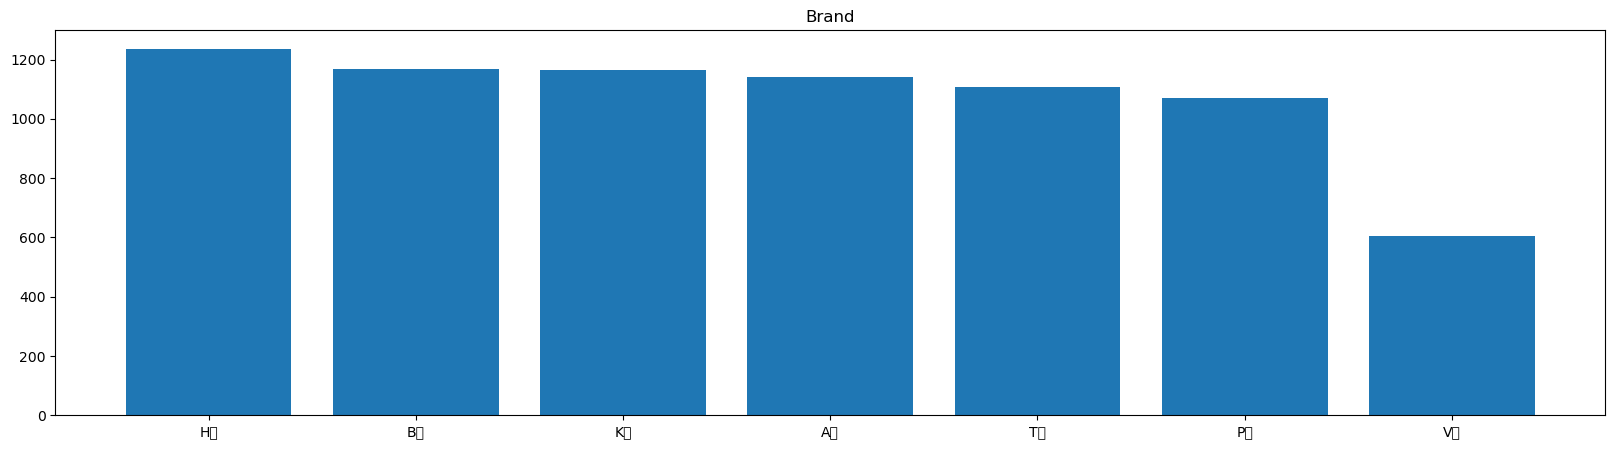

In [12]:
print(train['brand'].value_counts())

print("-" * 100)

plt.figure(figsize=(20, 5))
plt.bar(train['brand'].value_counts().index, train['brand'].value_counts().values)
plt.title('Brand')

model
ID4       605
i5        414
Niro      398
Soul      397
i3        388
RSeTGT    385
eT        379
ION6      379
Q4eT      378
TayGTS    375
EV6       369
iX        367
KNE       365
Tay       361
ION5      353
TayCT     335
MY        289
M3        279
MS        277
MX        264
IONIQ     140
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'model')

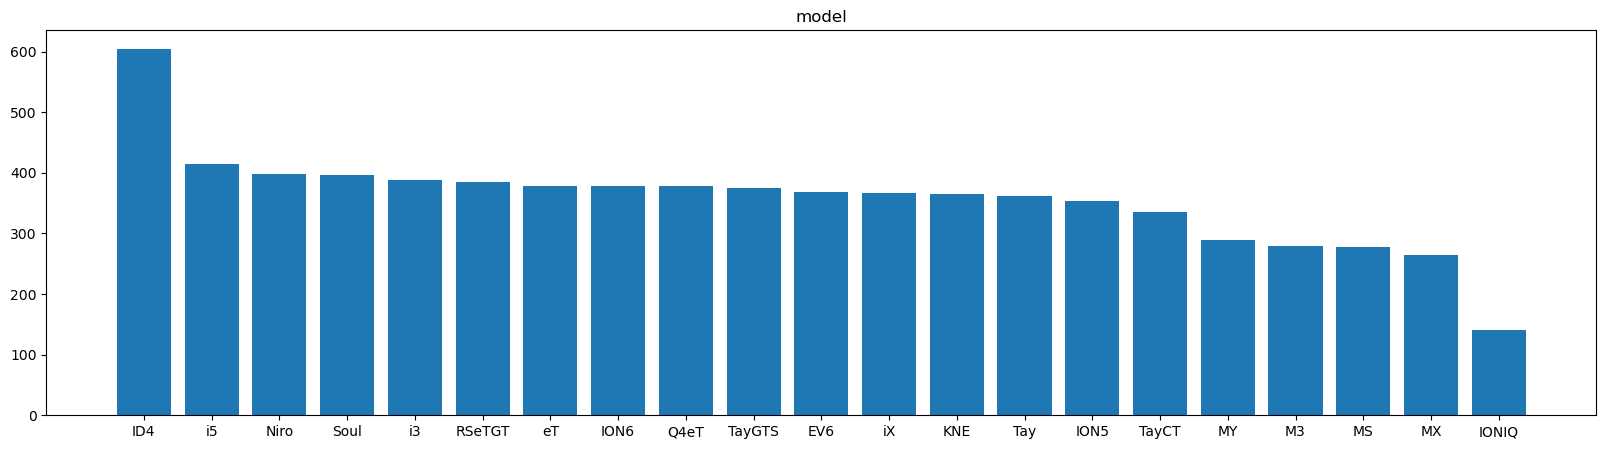

In [13]:
print(train['model'].value_counts())

print("-" * 100)

plt.figure(figsize=(20, 5))
plt.bar(train['model'].value_counts().index, train['model'].value_counts().values)
plt.title('model')

status
Brand New     3380
Nearly New    2059
Pre-Owned     2058
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'status')

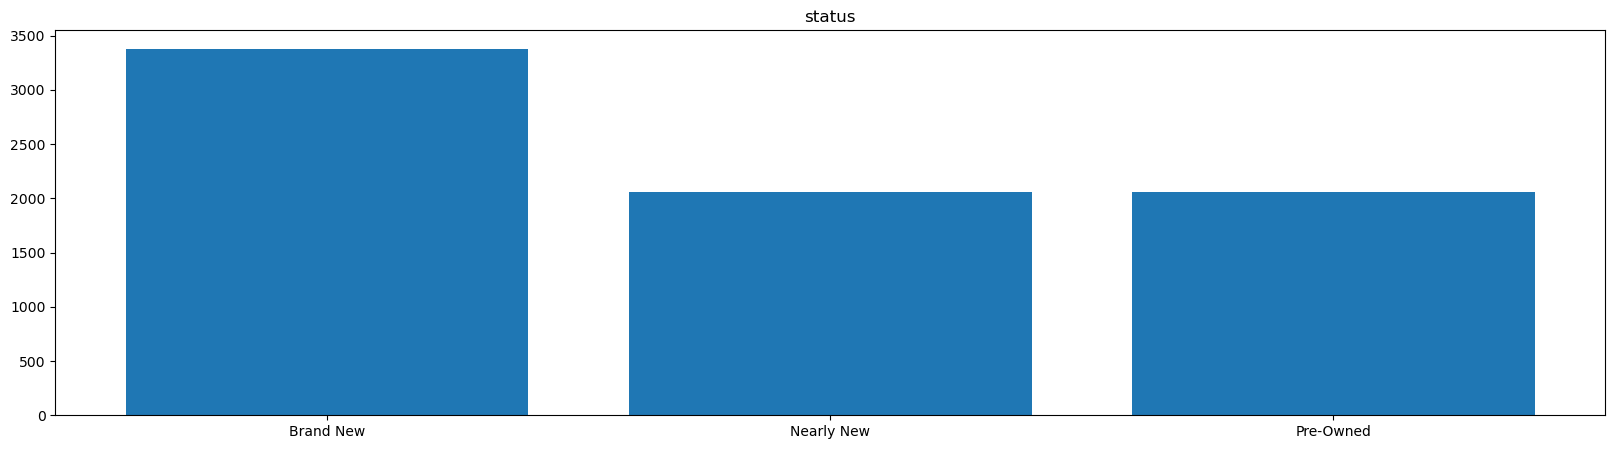

In [14]:
print(train['status'].value_counts())

print("-" * 100)

plt.figure(figsize=(20, 5))
plt.bar(train['status'].value_counts().index, train['status'].value_counts().values)
plt.title('status')

driving_sys
AWD    5167
FWD    1267
RWD    1063
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'driving_sys')

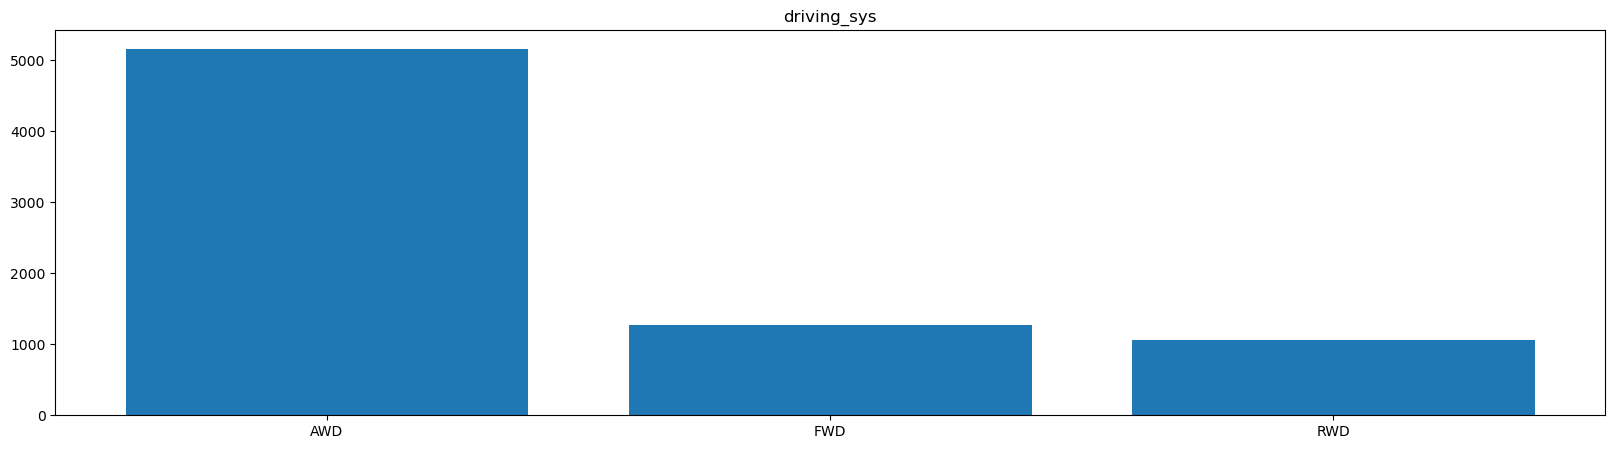

In [15]:
print(train['driving_sys'].value_counts())

print("-" * 100)

plt.figure(figsize=(20, 5))
plt.bar(train['driving_sys'].value_counts().index, train['driving_sys'].value_counts().values)
plt.title('driving_sys')

accident
No     7154
Yes     343
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'accident')

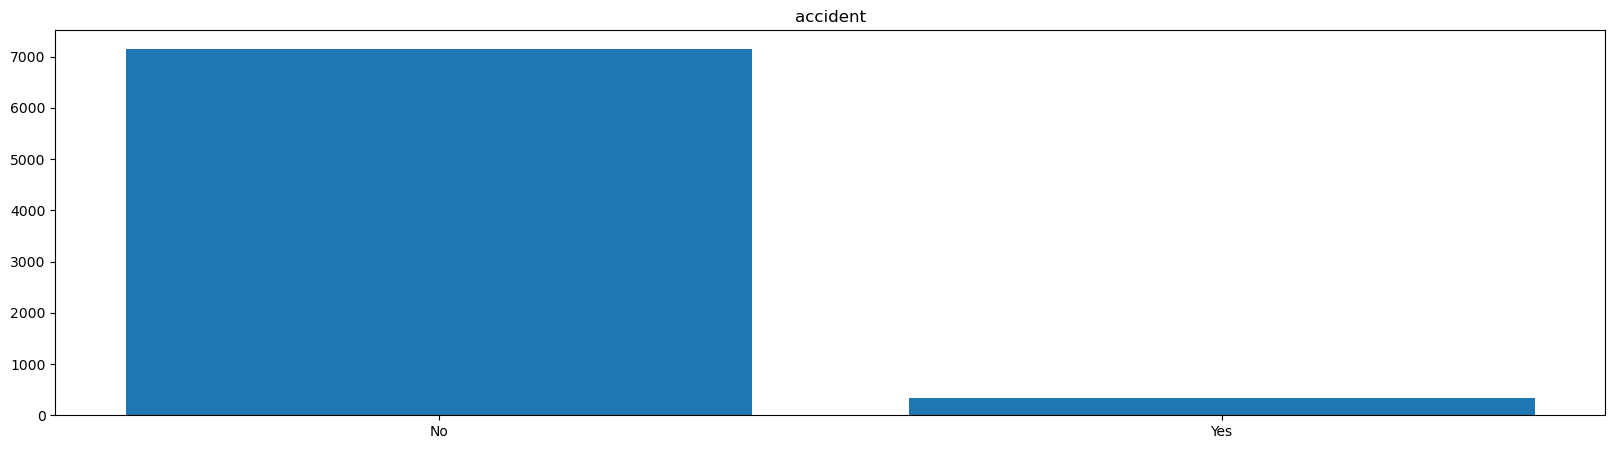

In [16]:
print(train['accident'].value_counts())

print("-" * 100)

plt.figure(figsize=(20, 5))
plt.bar(train['accident'].value_counts().index, train['accident'].value_counts().values)
plt.title('accident')

## Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le1 = LabelEncoder()
le1.fit(train['brand'])
print(le1.classes_)
train['brand'] = le1.transform(train['brand'])
test['brand'] = le1.transform(test['brand'])

le2 = LabelEncoder()
le2.fit(train['model'])
print(le1.classes_)
train['model'] = le2.transform(train['model'])
test['model'] = le2.transform(test['model']) 

le3 = LabelEncoder()
le3.fit(train['status'])
print(le3.classes_)
train['status'] = le3.transform(train['status'])
test['status'] = le3.transform(test['status'])

le4 = LabelEncoder()
le4.fit(train['driving_sys'])
print(le4.classes_)
train['driving_sys'] = le4.transform(train['driving_sys'])
test['driving_sys'] = le4.transform(test['driving_sys'])

le5 = LabelEncoder()
le5.fit(train['accident'])
print(le5.classes_)
train['accident'] = le5.transform(train['accident'])
test['accident'] = le5.transform(test['accident'])

['A사' 'B사' 'H사' 'K사' 'P사' 'T사' 'V사']
['A사' 'B사' 'H사' 'K사' 'P사' 'T사' 'V사']
['Brand New' 'Nearly New' 'Pre-Owned']
['AWD' 'FWD' 'RWD']
['No' 'Yes']


## Correlation

In [19]:
train = train.drop('ID', axis=1)
train

,brand,model,status,battery,driving_sys,mileage,warranty,accident,year,price
0,4,16,1,86.077000,0,13642,0,0,2,159.66
1,3,10,1,56.000000,1,10199,6,0,0,28.01
2,0,17,0,91.200000,0,2361,7,0,0,66.27
3,0,12,1,84.399252,0,21683,3,0,0,99.16
4,1,19,2,61.018000,0,178205,1,0,0,62.02
...,...,...,...,...,...,...,...,...,...,...
7492,2,2,0,66.439545,0,3773,10,0,0,35.95
7493,1,18,2,46.000000,2,135411,2,0,0,23.40
7494,4,15,0,77.563933,0,1363,2,0,0,120.00
7495,1,18,1,56.000000,2,39445,6,0,2,24.00


In [20]:
train.corr()

,brand,model,status,battery,driving_sys,mileage,warranty,accident,year,price
brand,1.000000,-0.456246,-0.003524,-0.053238,-0.161701,0.007119,-0.109198,0.003991,-0.018010,0.115258
model,-0.456246,1.000000,0.065619,0.026001,0.206105,0.056717,-0.293671,0.007158,0.007291,0.441733
status,-0.003524,0.065619,1.000000,-0.560073,0.013026,0.853196,-0.768512,0.000371,0.103255,-0.065019
battery,-0.053238,0.026001,-0.560073,1.000000,-0.160354,-0.470917,0.383864,-0.016054,-0.029175,0.440537
driving_sys,-0.161701,0.206105,0.013026,-0.160354,1.000000,0.003149,0.082218,-0.005461,0.018356,-0.297554
mileage,0.007119,0.056717,0.853196,-0.470917,0.003149,1.000000,-0.664071,-0.000616,-0.089586,-0.035488
warranty,-0.109198,-0.293671,-0.768512,0.383864,0.082218,-0.664071,1.000000,-0.008011,0.035294,-0.349962
accident,0.003991,0.007158,0.000371,-0.016054,-0.005461,-0.000616,-0.008011,1.000000,-0.010446,0.004627
year,-0.018010,0.007291,0.103255,-0.029175,0.018356,-0.089586,0.035294,-0.010446,1.000000,-0.058455
price,0.115258,0.441733,-0.065019,0.440537,-0.297554,-0.035488,-0.349962,0.004627,-0.058455,1.000000


<Axes: >

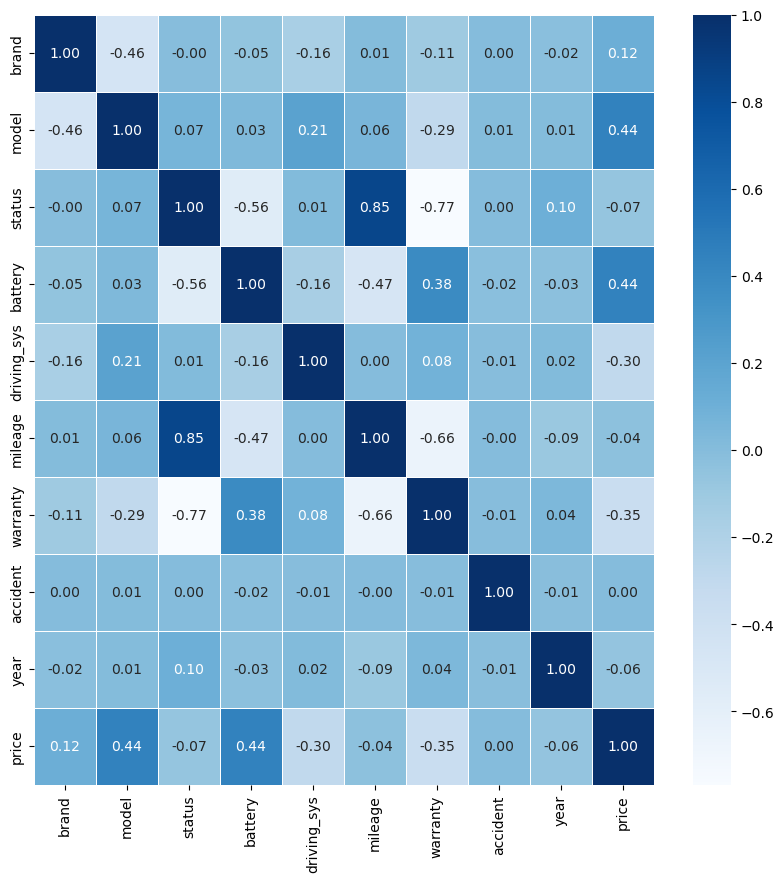

In [21]:
# %matplotlib inline 

plt.figure(figsize=(10,10))
sns.heatmap(data = train.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [22]:
train.to_csv('./refined_train_private.csv', index=False)
test.to_csv('./refined_test_private.csv', index=False)

# Model Prediction

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import  MinMaxScaler

df1 = pd.read_csv("./refined_train_private.csv")
df2 = pd.read_csv("./refined_test_private.csv")


X = df1.drop(['price'], axis=1)
re_df2 = df2.drop('ID', axis=1)
y = df1['price']

train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=0.18, random_state=2025, shuffle=True)


ms = MinMaxScaler()
train_x = ms.fit_transform(train_x)
val_x = ms.transform(val_x)

print(train_x.shape)
print(val_y.shape)


model = DecisionTreeRegressor(max_depth=10, random_state=2532, max_features=10, max_leaf_nodes=167)
model.fit(train_x, train_y)
prediction = model.predict(val_x)
mse = mean_squared_error(val_y, prediction)
rmse = np.sqrt(mse)

print(f'DecisionTreeRegressor - MSE: {mse}, RMSE: {rmse}')

re_df2 = ms.fit_transform(re_df2)

prediction = model.predict(re_df2)
submission=pd.DataFrame()
submission['ID'] = df2['ID']  
submission['가격(백만원)']=prediction

submission.to_csv("./25_01_05_04_submission.csv", index=False)

(6147, 9)
(1350,)
DecisionTreeRegressor - MSE: 1.8770418685374501, RMSE: 1.3700517758601134
